In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import median_absolute_error as mdae
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
# import keras.backend as K
# from keras.callbacks import EarlyStopping
# import keras_tuner as kt
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Bidirectional
from sklearn.model_selection import KFold

ModuleNotFoundError: No module named 'keras'

In [ ]:
df = pd.read_csv('gold.csv', index_col='Date', parse_dates=True, usecols=['Date','Close'])
split_size = int(0.8 * len(df))
test_data = df.iloc[split_size: , : ]
train_data = df.iloc[ :split_size, : ]

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df)
plt.xlabel("Time (Daily)",fontsize=25)
plt.ylabel("Price",fontsize=25)
plt.title("Gold Closing Prices",fontsize=35)
plt.savefig(fname="gold.pdf", dpi=300)

In [ ]:
ax=train_data.plot()
test_data.plot(ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_acf(df, lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Autocorrelation', fontsize=25)
ax.set_title('Autocorrelation Function', fontsize=35)
plt.savefig(fname="gold_acf.pdf", dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_pacf(df, lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Partial Autocorrelation', fontsize=25)
ax.set_title('Partial Autocorrelation Function', fontsize=35)
plt.savefig(fname="gold_pacf.pdf", dpi=300)

In [ ]:
model_auto = auto_arima(df.Close)
parameter = model_auto.get_params().get('order')
parameter

In [ ]:
adf = adfuller(df)
print(adf[1], kpss(df)[1])

In [ ]:
adf = adfuller(df.diff().dropna())
print(adf[1], kpss(df.diff().dropna())[1])

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df.diff().dropna())
plt.xlabel("Time (Daily)",fontsize=25)
plt.ylabel("Differenced Price",fontsize=25)
plt.title("Second Order Differentiated Gold Prices",fontsize=35)
plt.savefig(fname="gold_diff.pdf", dpi=300)

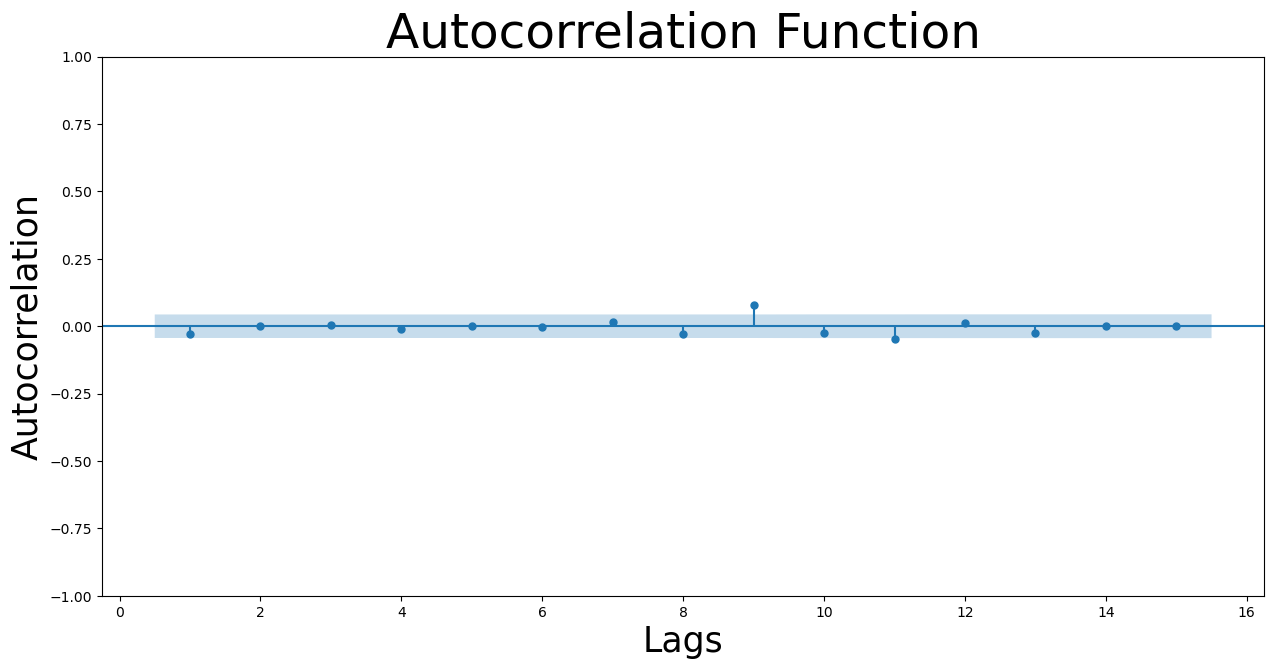

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_acf(df.diff().dropna(), lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Autocorrelation', fontsize=25)
ax.set_title('Autocorrelation Function', fontsize=35)
plt.savefig(fname="gold_diff_acf.pdf", dpi=300)

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


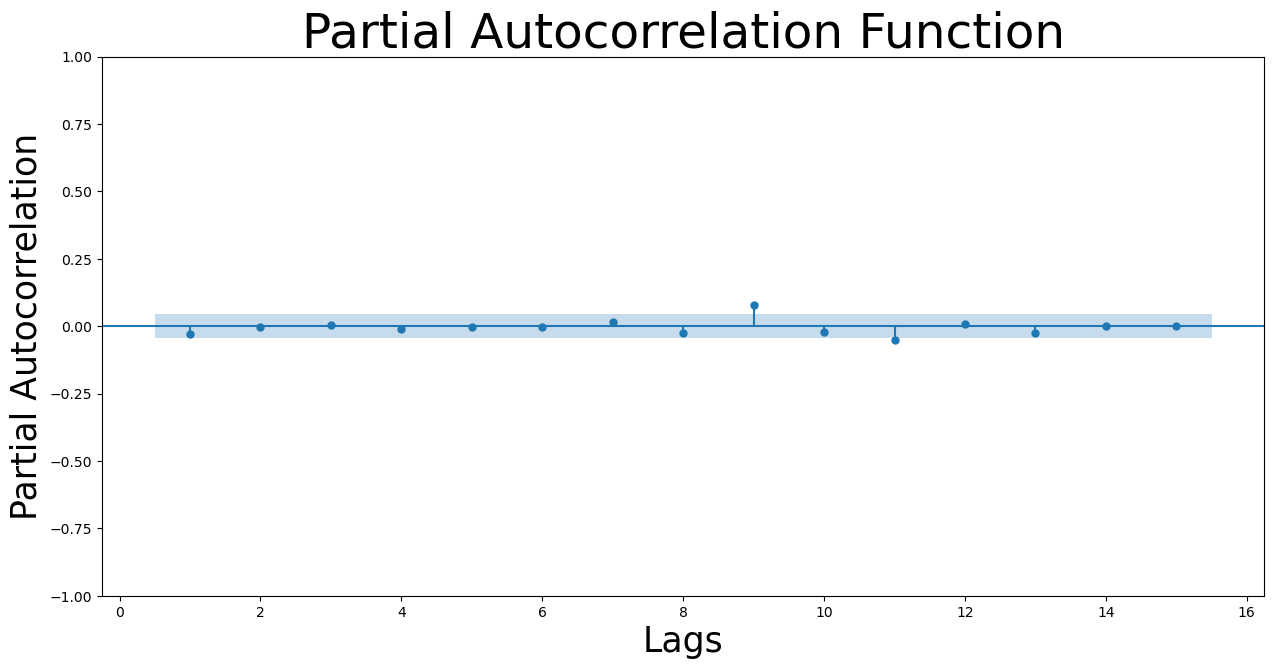

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))
plot_pacf(df.diff().dropna(), lags = 15, zero=False, ax=ax)
ax.set_xlabel('Lags', fontsize=25)
ax.set_ylabel('Partial Autocorrelation', fontsize=25)
ax.set_title('Partial Autocorrelation Function', fontsize=35)
plt.savefig(fname="gold_diff_pacf.pdf", dpi=300)

In [14]:
arima_model = ARIMA(train_data.Close, order = parameter)
results = arima_model.fit()
results.summary()

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1615
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6759.055
Date:                Wed, 04 Oct 2023   AIC                          13520.111
Time:                        09:15:04   BIC                          13525.497
Sample:                             0   HQIC                         13522.110
                               - 1615                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       254.0829      4.019     63.224      0.000     246.206     261.960
===================================================================================
Ljung-Box (L1) (Q):                   1.58   Jarque-Bera (JB):              4460.40
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

E:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


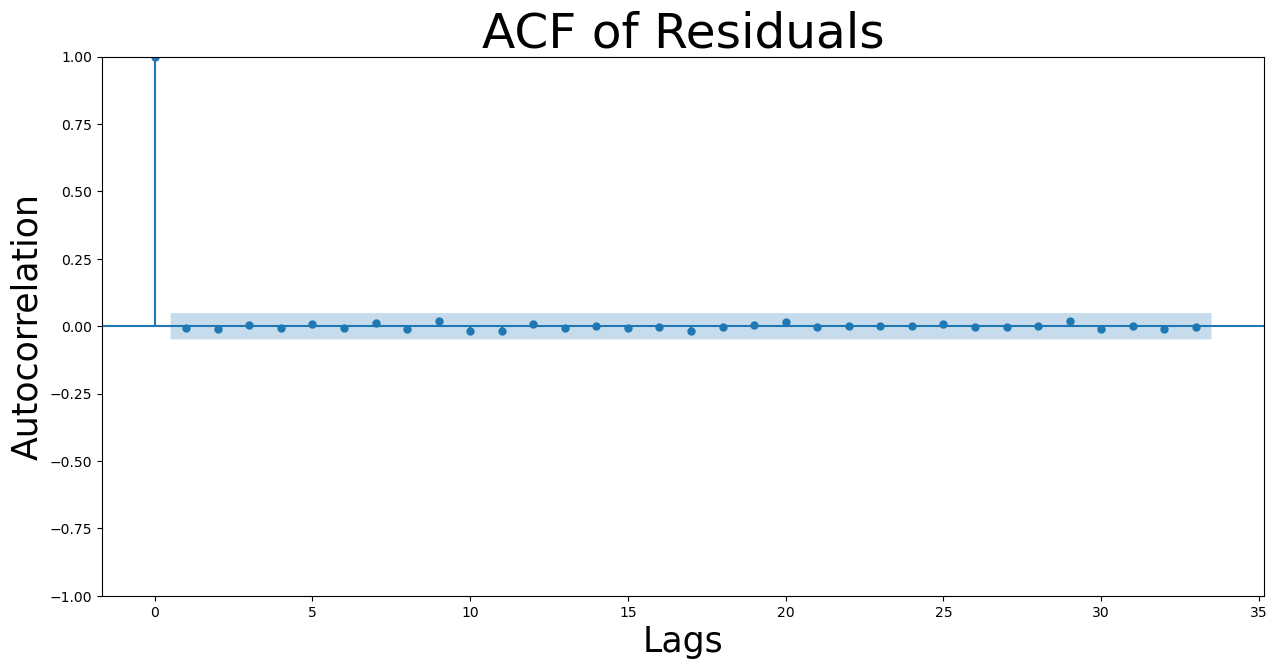

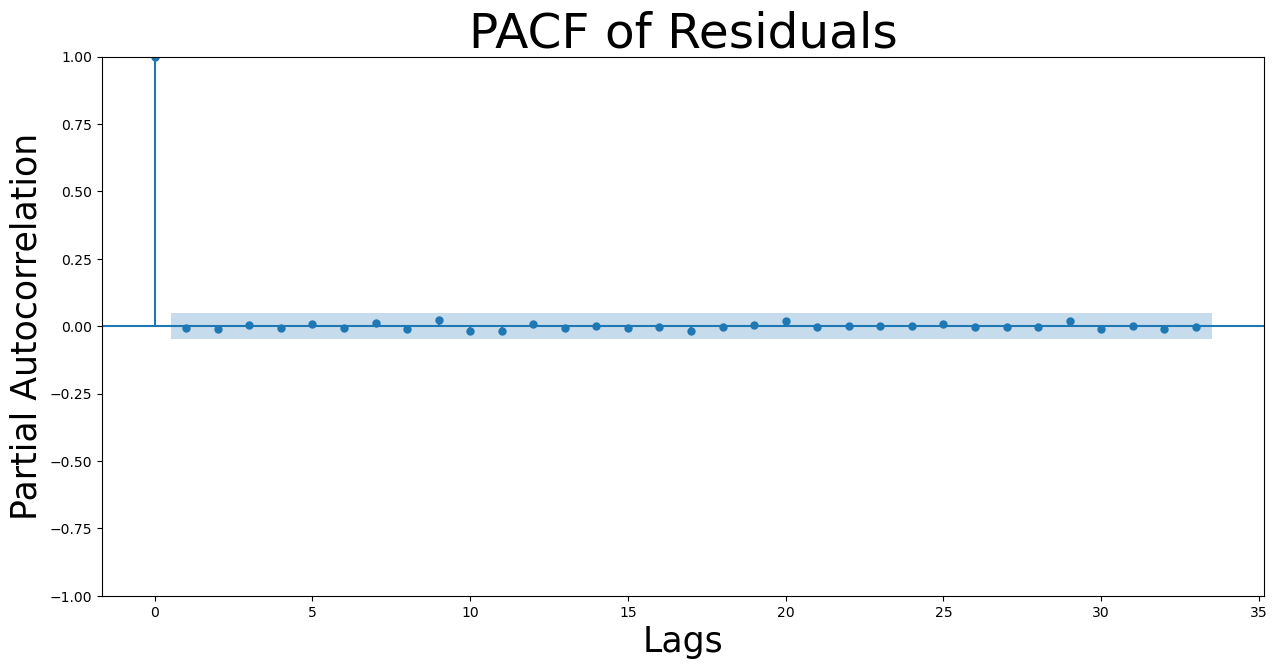

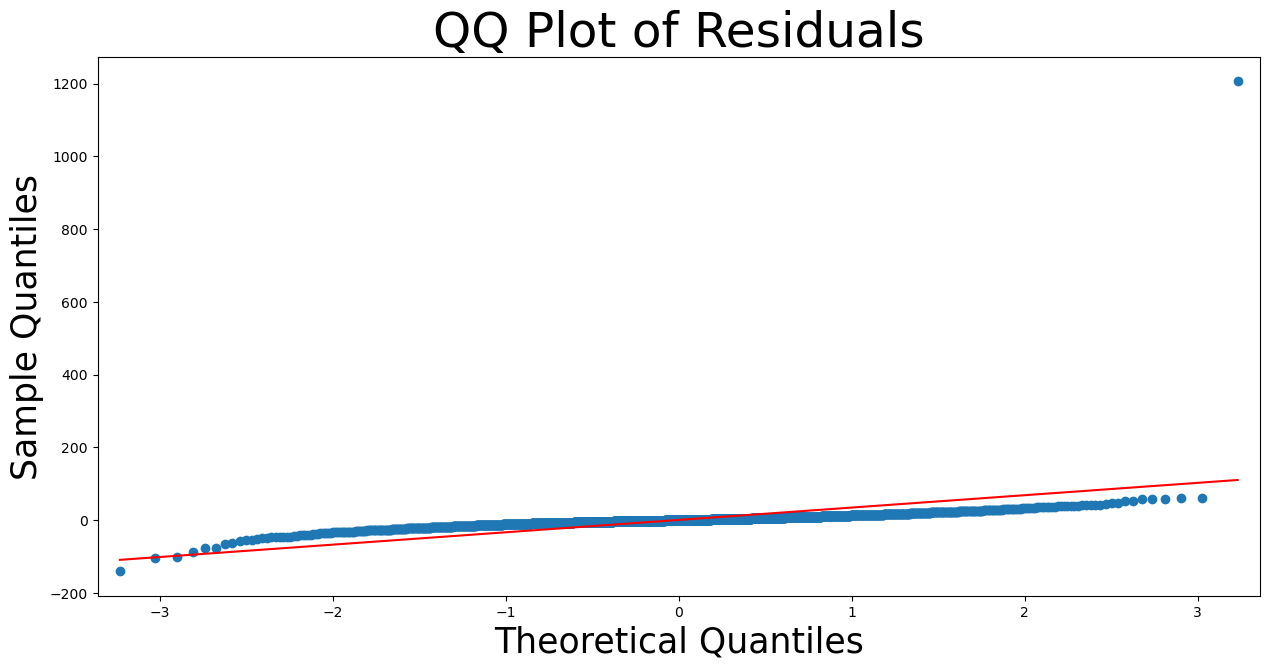

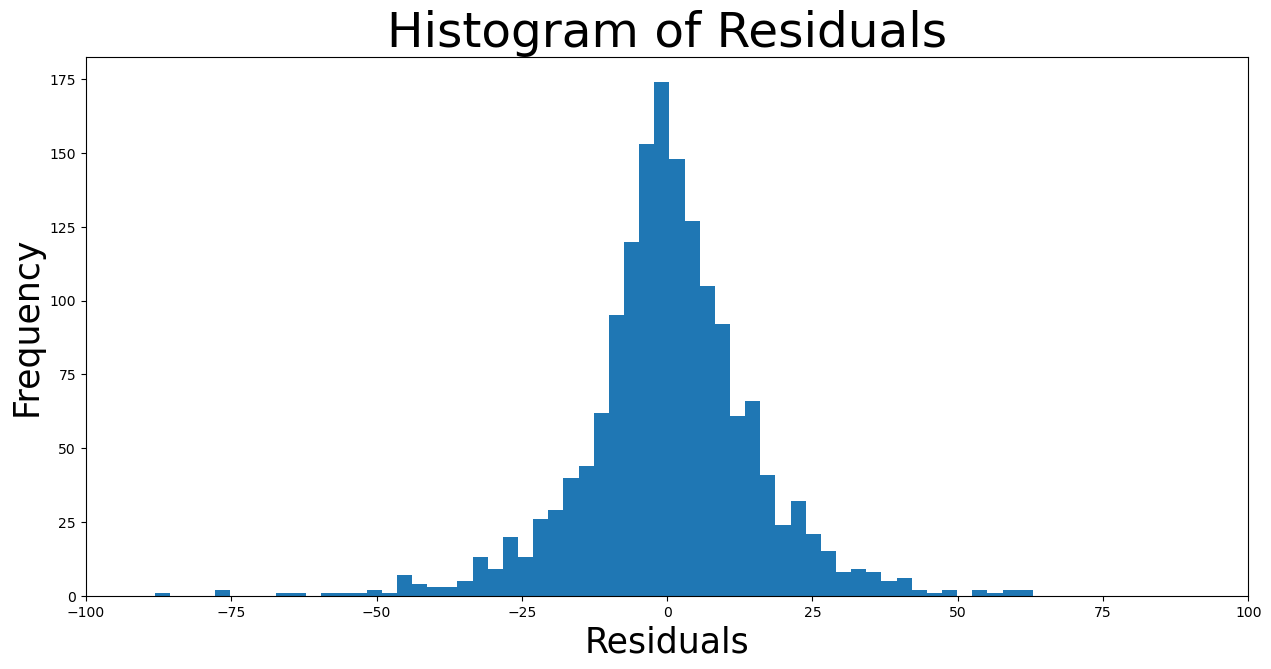

In [15]:
residuals = results.resid

# Plot ACF of the residuals
fig1, ax1 = plt.subplots(figsize=(15, 7))
sm.graphics.tsa.plot_acf(residuals, ax=ax1)
ax1.set_xlabel('Lags', fontsize=25)
ax1.set_ylabel('Autocorrelation', fontsize=25)
ax1.set_title('ACF of Residuals', fontsize=35)
plt.savefig(fname="gold_resid_acf.pdf", dpi=300)

# Plot PACF of the residuals
fig2, ax2 = plt.subplots(figsize=(15, 7))
sm.graphics.tsa.plot_pacf(residuals, ax=ax2)
ax2.set_xlabel('Lags', fontsize=25)
ax2.set_ylabel('Partial Autocorrelation', fontsize=25)
ax2.set_title('PACF of Residuals', fontsize=35)
plt.savefig(fname="gold_resid_pacf.pdf", dpi=300)

# Plot QQ plot of the residuals
fig3, ax3 = plt.subplots(figsize=(15, 7))
qqplot(residuals, line='s', ax=ax3)
ax3.set_xlabel('Theoretical Quantiles', fontsize=25)
ax3.set_ylabel('Sample Quantiles', fontsize=25)
ax3.set_title('QQ Plot of Residuals', fontsize=35)
plt.savefig(fname="gold_resid_qqplot.pdf", dpi=300)

# Plot histogram of the residuals
fig4, ax4 = plt.subplots(figsize=(15, 7))
ax4.hist(residuals, bins='auto')
ax4.set_xlabel('Residuals', fontsize=25)
ax4.set_ylabel('Frequency', fontsize=25)
ax4.set_title('Histogram of Residuals', fontsize=35)
plt.xlim([-100, 100])
plt.savefig(fname="gold_resid_hist.pdf", dpi=300)

In [16]:
arima_preds = []
dummy = list(train_data.Close)
dummy_test = list(test_data.Close)
for i in range(len(test_data)):
    dummy_model = ARIMA(dummy, order = parameter)
    yhat = list(dummy_model.fit().forecast())
    arima_preds.append(yhat)
    dummy.append(dummy_test[i])
    

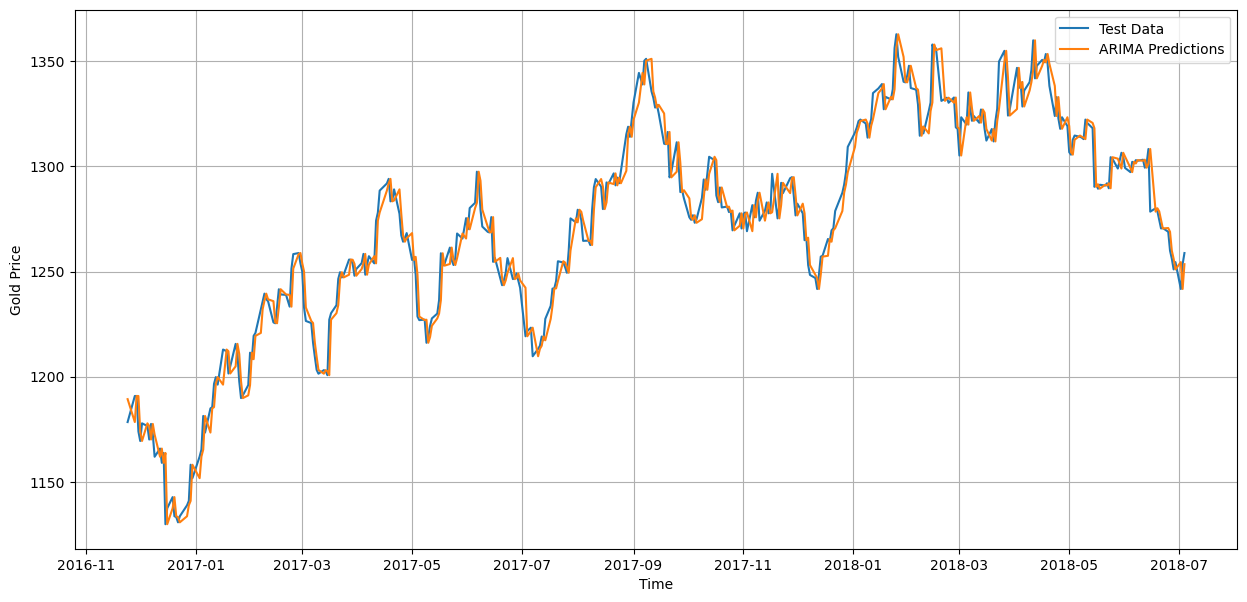

In [17]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test Data')
plt.grid(True)
plt.plot(test_data.index, arima_preds,label='ARIMA Predictions')
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend(fontsize=10)
plt.show()

In [18]:
rmse_arima = rmse(test_data, arima_preds)
rmse_arima[0]

8.642662715383562

In [19]:
mape_arima = mape(test_data, arima_preds)
mape_arima*100

0.5140413120587991

In [20]:
mdae_arima = mdae(test_data, arima_preds)
print("Median Absolute Error:", mdae_arima)

Median Absolute Error: 4.900000000000091


In [21]:
arima_r2 = r2(test_data, arima_preds)
arima_r2

0.9706380712390372

In [22]:
val_size = int(len(train_data) * 0.2)
validation_data = train_data[-val_size:]
train_data = train_data[:-val_size]

In [23]:
arima_val_preds = []
dummy = list(train_data.Close)
dummy_test = list(validation_data.Close)
for i in range(len(validation_data)):
    dummy_model = ARIMA(dummy, order = parameter)
    yhat = list(dummy_model.fit().forecast())
    arima_val_preds.append(yhat)
    dummy.append(dummy_test[i])

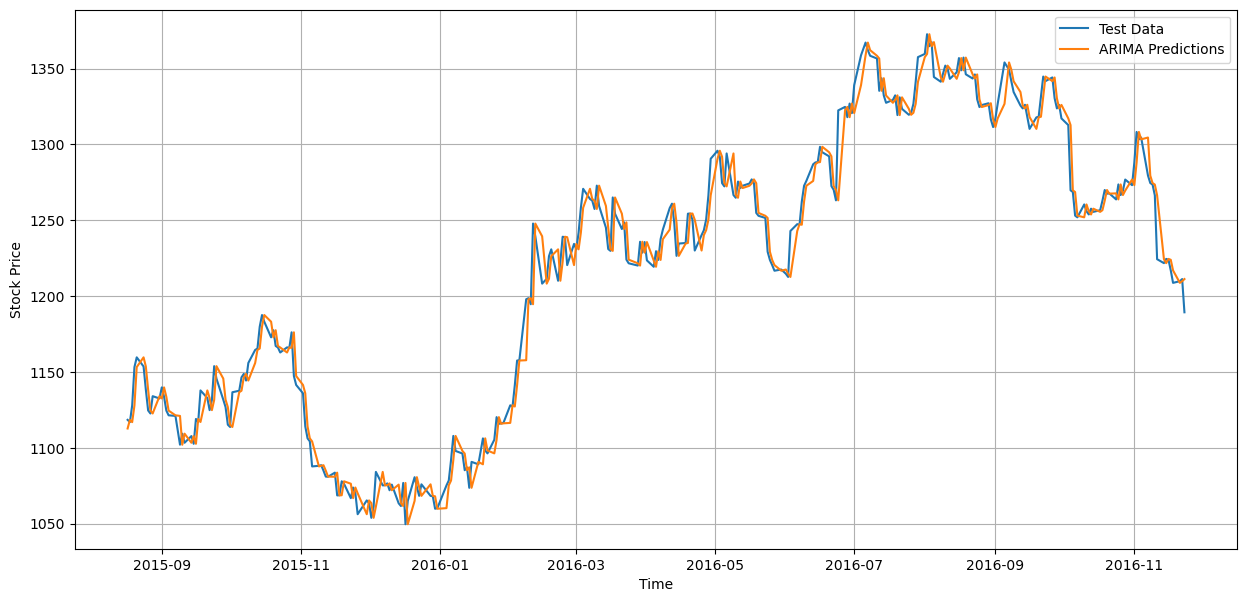

In [24]:
plt.figure(figsize=(15,7))
plt.plot(validation_data,label='Test Data')
plt.grid(True)
plt.plot(validation_data.index, arima_val_preds,label='ARIMA Predictions')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend(fontsize=10)
plt.show()

In [25]:
train_data

,Close
Date,
2010-07-01,1206.7
2010-07-02,1207.7
2010-07-05,1195.1
2010-07-07,1198.9
2010-07-08,1196.1
...,...
2015-08-10,1104.1
2015-08-11,1107.7
2015-08-12,1123.6


In [26]:
validation_data

,Close
Date,
2015-08-17,1118.4
2015-08-18,1116.9
2015-08-19,1127.9
2015-08-20,1153.2
2015-08-21,1159.6
...,...
2016-11-17,1216.9
2016-11-18,1208.7
2016-11-21,1209.8


In [27]:
test_data

,Close
Date,
2016-11-24,1178.4
2016-11-28,1190.8
2016-11-29,1190.8
2016-11-30,1173.9
2016-12-01,1169.4
...,...
2018-06-28,1251.0
2018-06-29,1254.5
2018-07-02,1241.7


In [28]:
WINDOW_SIZE = 7

In [29]:
ext_test_data = test_data
ext_test_data = pd.concat([validation_data[-WINDOW_SIZE:], test_data])
ext_val_data = validation_data
ext_val_data = pd.concat([train_data[-WINDOW_SIZE:], validation_data])

In [30]:
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_validation_data = scaler.transform(ext_val_data)
scaled_test_data = scaler.transform(ext_test_data)

In [31]:
norm_arima_preds = scaler.transform(arima_preds)
norm_arima_preds

E:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.12872024],
       [0.11520337],
       [0.13058036],
       [0.13058036],
       [0.10962302],
       [0.10404266],
       [0.11445933],
       [0.11284722],
       [0.10491071],
       [0.1140873 ],
       [0.1077629 ],
       [0.09474206],
       [0.09957837],
       [0.09114583],
       [0.09697421],
       [0.05493552],
       [0.06436012],
       [0.07093254],
       [0.05964782],
       [0.05915179],
       [0.05605159],
       [0.05964782],
       [0.06609623],
       [0.0687004 ],
       [0.09002976],
       [0.08209325],
       [0.09486607],
       [0.09895833],
       [0.1187996 ],
       [0.10900298],
       [0.12326389],
       [0.12400794],
       [0.13777282],
       [0.14174107],
       [0.13727679],
       [0.15798611],
       [0.15699405],
       [0.14384921],
       [0.14806548],
       [0.16133433],
       [0.15538194],
       [0.13926091],
       [0.12934028],
       [0.13095238],
       [0.13702877],
       [0.15612599],
       [0.15228175],
       [0.166

In [32]:
norm_arima_rmse = rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(norm_arima_preds).squeeze())
norm_arima_mape = mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(norm_arima_preds).squeeze())
norm_arima_mdae = mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(norm_arima_preds).squeeze())
print(norm_arima_rmse, norm_arima_mape, norm_arima_mdae)

0.010717587692687955 0.03998216928306828 0.0060763888888888395


In [33]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return sequences

In [34]:
train_sequences = create_sequences(scaled_train_data, WINDOW_SIZE+1)
train_sequences = np.array(train_sequences)
X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1]
print(X_train.shape, y_train.shape)

(1285, 7, 1) (1285, 1)


In [35]:
test_sequences = create_sequences(scaled_test_data, WINDOW_SIZE+1)
test_sequences = np.array(test_sequences)
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1]
print(X_test.shape, y_test.shape)

(404, 7, 1) (404, 1)


In [36]:
val_sequences = create_sequences(scaled_validation_data, WINDOW_SIZE+1)
val_sequences = np.array(val_sequences)
X_val = val_sequences[:, :-1]
y_val = val_sequences[:, -1]
print(X_val.shape, y_val.shape)

(323, 7, 1) (323, 1)


In [37]:
optimizer = 'adam'
batch_size = 32

In [38]:
# def lstm_model(hp):
#     model = Sequential()
#     model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1)))
#     for i in range(hp.Int('n_layers', 1, 10)):
#         model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True))
#     model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

In [39]:
# lstm_tuner= kt.RandomSearch(
#     lstm_model,
#     objective='val_loss',
#     max_trials=20,
#     executions_per_trial=3,
#     directory='mydir',
#     project_name='gold',
# )

In [40]:
# lstm_tuner.search(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=128,
#     validation_data=(X_val,y_val),
# )

In [41]:
# best_lstm_model = lstm_tuner.get_best_models(num_models=1)[0]
# best_lstm_model.summary()

In [42]:
lstm_model = Sequential()
lstm_model.add(LSTM(128,return_sequences=True, input_shape=(7,1)))
lstm_model.add(LSTM(64,return_sequences=True))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0))
lstm_model.add(Dense(128))
lstm_model.add(Dropout(0))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [43]:
history_lstm = lstm_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
41/41 [==============================] - 13s 81ms/step - loss: 0.0297 - val_loss: 0.0015
Epoch 2/100
41/41 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 3/100
41/41 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 9.3389e-04
Epoch 4/100
41/41 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 9.6929e-04
Epoch 5/100
41/41 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 9.0734e-04
Epoch 6/100
41/41 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 9.0612e-04
Epoch 7/100
41/41 [==============================] - 1s 16ms/step - loss: 0.0017 - val_loss: 9.0806e-04
Epoch 8/100
41/41 [==============================] - 1s 15ms/step - loss: 0.0017 - val_loss: 9.2074e-04
Epoch 9/100
41/41 [==============================] - 1s 15ms/step - loss: 0.0016 - val_loss: 8.6757e-04
Epoch 10/100
41/41 [==============================] - 1s 16ms/step - lo

41/41 [==============================] - 1s 15ms/step - loss: 5.7062e-04 - val_loss: 3.0529e-04
Epoch 78/100
41/41 [==============================] - 1s 15ms/step - loss: 5.7550e-04 - val_loss: 2.5216e-04
Epoch 79/100
41/41 [==============================] - 1s 15ms/step - loss: 5.7225e-04 - val_loss: 2.4454e-04
Epoch 80/100
41/41 [==============================] - 1s 14ms/step - loss: 5.2268e-04 - val_loss: 2.8558e-04
Epoch 81/100
41/41 [==============================] - 1s 14ms/step - loss: 5.1067e-04 - val_loss: 2.9522e-04
Epoch 82/100
41/41 [==============================] - 1s 14ms/step - loss: 5.5692e-04 - val_loss: 2.4472e-04
Epoch 83/100
41/41 [==============================] - 1s 15ms/step - loss: 5.8326e-04 - val_loss: 2.6078e-04
Epoch 84/100
41/41 [==============================] - 1s 15ms/step - loss: 4.9117e-04 - val_loss: 2.4447e-04
Epoch 85/100
41/41 [==============================] - 1s 15ms/step - loss: 4.7690e-04 - val_loss: 2.7769e-04
Epoch 86/100
41/41 [============

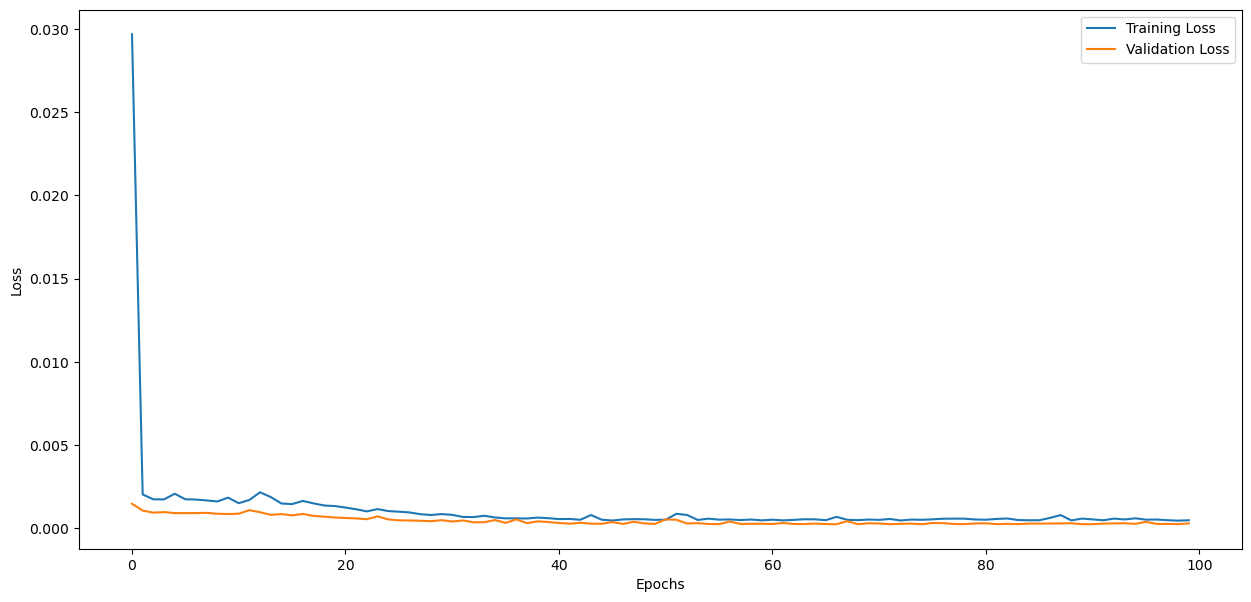

In [44]:
history_df = pd.DataFrame(history_lstm.history)

# Plot the data with labels and increased figsize
plt.figure(figsize=(15, 7))  # Set the figsize
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a legend
plt.legend()

# Show the plot
plt.savefig(fname="Gold_lstm_lve.pdf", dpi=300)

In [45]:
lstm_norm_val_preds = lstm_model.predict(X_val)
lstm_val_preds = scaler.inverse_transform(lstm_norm_val_preds)

11/11 [==============================] - 1s 6ms/step


In [46]:
from sklearn.linear_model import LinearRegression
regX = np.concatenate((np.array(arima_val_preds),lstm_val_preds),axis=1)
regY = validation_data.Close.values.reshape(-1,1)
reg = LinearRegression().fit(regX, regY)
print(reg.coef_, reg.intercept_, reg.score(regX, regY))

[[0.94785117 0.04167689]] [13.2133954] 0.9826183505313514


In [47]:
lstm_norm_preds = lstm_model.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_norm_preds)

13/13 [==============================] - 0s 7ms/step


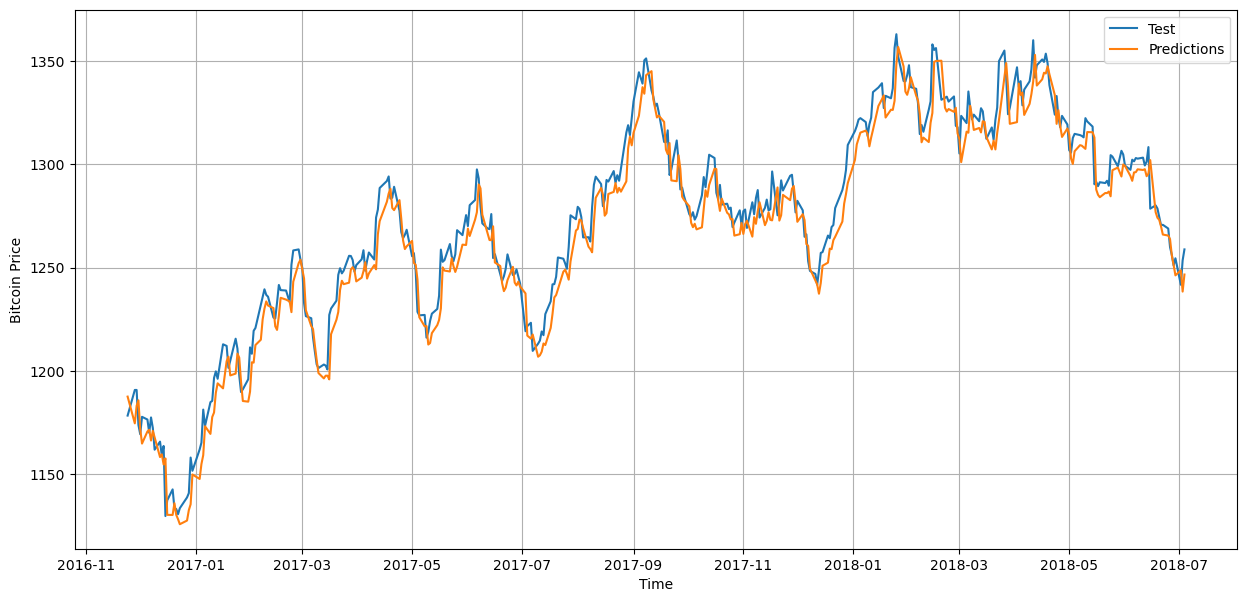

In [48]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, lstm_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [49]:
reg_test = np.concatenate((np.array(arima_preds),lstm_preds),axis=1)
arima_lstm_preds = reg.predict(reg_test)

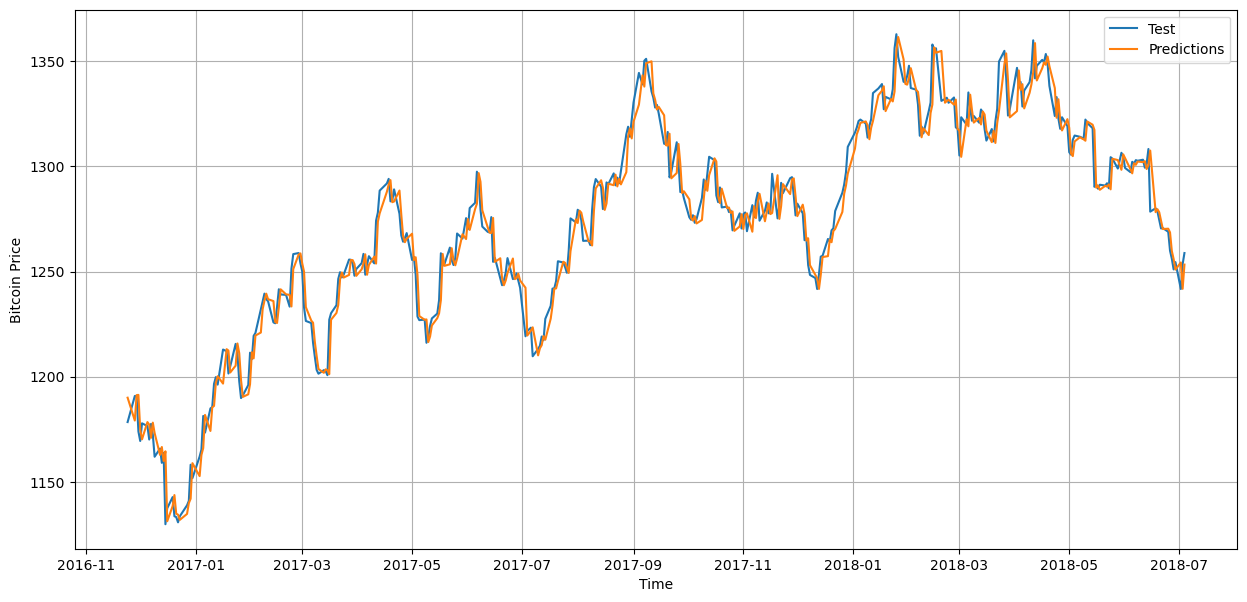

In [50]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, arima_lstm_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [51]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_lstm_rmse_scores = []
norm_lstm_mdae_scores = []
norm_lstm_mape_scores = []

lstm_rmse_scores = []
lstm_mdae_scores = []
lstm_mape_scores = []
lstm_r2_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
lstm_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = lstm_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = lstm_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_lstm_preds = lstm_model.predict(k_X_test)
    
    norm_lstm_rmse_scores.append(rmse(k_norm_lstm_preds, k_y_test)[0])
    norm_lstm_mdae_scores.append(mdae(k_norm_lstm_preds, k_y_test))
    norm_lstm_mape_scores.append(mape(k_norm_lstm_preds, k_y_test))
    
    k_lstm_preds = lstm_scaler.inverse_transform(k_norm_lstm_preds)
    
    lstm_rmse_scores.append(rmse(k_lstm_preds, k_y_test)[0])
    lstm_mdae_scores.append(mdae(k_lstm_preds, k_y_test))
    lstm_mape_scores.append(mape(k_lstm_preds, k_y_test))
    lstm_r2_scores.append(r2(k_lstm_preds, k_y_test))


7/7 [==============================] - 0s 6ms/step


In [52]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_lstm_rmse = np.mean(norm_lstm_rmse_scores)
norm_std_lstm_rmse = np.std(norm_lstm_rmse_scores)
norm_avg_lstm_mdae = np.mean(norm_lstm_mdae_scores)
norm_std_lstm_mdae = np.std(norm_lstm_mdae_scores)
norm_avg_lstm_mape = np.mean(norm_lstm_mape_scores)
norm_std_lstm_mape = np.std(norm_lstm_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_lstm_rmse:.4f} +/- {norm_std_lstm_rmse:.4f}")
print(f"Average MDAE: {norm_avg_lstm_mdae:.4f} +/- {norm_std_lstm_mdae:.4f}")
print(f"Average MAPE: {norm_avg_lstm_mape:.4f} +/- {norm_std_lstm_mape:.4f}")

Average RMSE: 0.0193 +/- 0.0076
Average MDAE: 0.0119 +/- 0.0049
Average MAPE: 0.1642 +/- 0.3430


In [53]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
avg_lstm_rmse = np.mean(lstm_rmse_scores)
std_lstm_rmse = np.std(lstm_rmse_scores)
avg_lstm_mdae = np.mean(lstm_mdae_scores)
std_lstm_mdae = np.std(lstm_mdae_scores)
avg_lstm_mape = np.mean(lstm_mape_scores)
std_lstm_mape = np.std(lstm_mape_scores)
avg_lstm_r2 = np.mean(lstm_r2_scores)
std_lstm_r2 = np.std(lstm_r2_scores)

# Print the overall evaluation results
print(f"Average RMSE: {avg_lstm_rmse:.4f} +/- {std_lstm_rmse:.4f}")
print(f"Average MDAE: {avg_lstm_mdae:.4f} +/- {std_lstm_mdae:.4f}")
print(f"Average MAPE: {avg_lstm_mape:.4f} +/- {std_lstm_mape:.4f}")
print(f"Average R2: {avg_lstm_r2:.4f} +/- {std_lstm_r2:.4f}")

Average RMSE: 1358.3698 +/- 178.8232
Average MDAE: 1350.5157 +/- 175.0137
Average MAPE: 0.9997 +/- 0.0001
Average R2: -779.0144 +/- 533.4939


In [54]:
# def bi_lstm_model(hp):
#     model = Sequential()
#     model.add(Bidirectional(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1))))
#     for i in range(hp.Int('n_layers', 1, 10)):
#         model.add(Bidirectional(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True)))
#     model.add(Bidirectional(LSTM(hp.Int('input_unit',min_value=32,max_value=256,step=16))))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

In [55]:
# bi_lstm_tuner= kt.RandomSearch(
#     bi_lstm_model,
#     objective='val_loss',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='mydir',
#     project_name='gold_bi_lstm',
# )

In [56]:
# bi_lstm_tuner.search(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=128,
#     validation_data=(X_val,y_val),
# )

In [57]:
# best_bi_lstm_model = bi_lstm_tuner.get_best_models(num_models=1)[0]
# best_bi_lstm_model.build(input_shape=(None,WINDOW_SIZE,1))
# best_bi_lstm_model.summary()

In [58]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(128,return_sequences=True, input_shape=(7,1))))
bi_lstm_model.add(Bidirectional(LSTM(192,return_sequences=True)))
bi_lstm_model.add(Bidirectional(LSTM(256,return_sequences=True)))
bi_lstm_model.add(Bidirectional(LSTM(192,return_sequences=True)))
bi_lstm_model.add(Bidirectional(LSTM(128)))
bi_lstm_model.add(Dropout(0))
bi_lstm_model.add(Dense(64))
bi_lstm_model.add(Dropout(0))
bi_lstm_model.add(Dense(1))
bi_lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [59]:
history_bi_lstm = bi_lstm_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
41/41 [==============================] - 22s 128ms/step - loss: 0.0202 - val_loss: 7.2028e-04
Epoch 2/100
41/41 [==============================] - 2s 41ms/step - loss: 0.0015 - val_loss: 7.9934e-04
Epoch 3/100
41/41 [==============================] - 2s 44ms/step - loss: 0.0014 - val_loss: 6.2223e-04
Epoch 4/100
41/41 [==============================] - 2s 38ms/step - loss: 0.0014 - val_loss: 6.9147e-04
Epoch 5/100
41/41 [==============================] - 2s 38ms/step - loss: 0.0012 - val_loss: 5.7407e-04
Epoch 6/100
41/41 [==============================] - 2s 39ms/step - loss: 0.0013 - val_loss: 5.7205e-04
Epoch 7/100
41/41 [==============================] - 2s 39ms/step - loss: 0.0011 - val_loss: 5.7549e-04
Epoch 8/100
41/41 [==============================] - 2s 39ms/step - loss: 0.0011 - val_loss: 8.8536e-04
Epoch 9/100
41/41 [==============================] - 1s 36ms/step - loss: 0.0011 - val_loss: 5.8343e-04
Epoch 10/100
41/41 [==============================] - 2s 38ms/

41/41 [==============================] - 1s 30ms/step - loss: 0.0011 - val_loss: 3.8410e-04
Epoch 78/100
41/41 [==============================] - 1s 28ms/step - loss: 7.4506e-04 - val_loss: 5.3866e-04
Epoch 79/100
41/41 [==============================] - 1s 30ms/step - loss: 6.9045e-04 - val_loss: 2.8627e-04
Epoch 80/100
41/41 [==============================] - 2s 37ms/step - loss: 7.1489e-04 - val_loss: 3.4424e-04
Epoch 81/100
41/41 [==============================] - 1s 36ms/step - loss: 7.3129e-04 - val_loss: 6.0935e-04
Epoch 82/100
41/41 [==============================] - 1s 34ms/step - loss: 5.5509e-04 - val_loss: 2.6858e-04
Epoch 83/100
41/41 [==============================] - 1s 36ms/step - loss: 6.7372e-04 - val_loss: 3.3627e-04
Epoch 84/100
41/41 [==============================] - 1s 26ms/step - loss: 6.0083e-04 - val_loss: 0.0014
Epoch 85/100
41/41 [==============================] - 1s 25ms/step - loss: 6.7461e-04 - val_loss: 0.0011
Epoch 86/100
41/41 [========================

<Axes: >

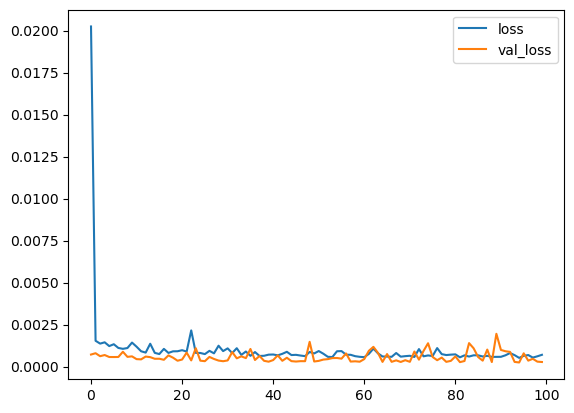

In [60]:
pd.DataFrame(history_bi_lstm.history).plot()

In [61]:
bi_lstm_norm_preds = bi_lstm_model.predict(X_test)
bi_lstm_preds = scaler.inverse_transform(bi_lstm_norm_preds)

13/13 [==============================] - 3s 16ms/step


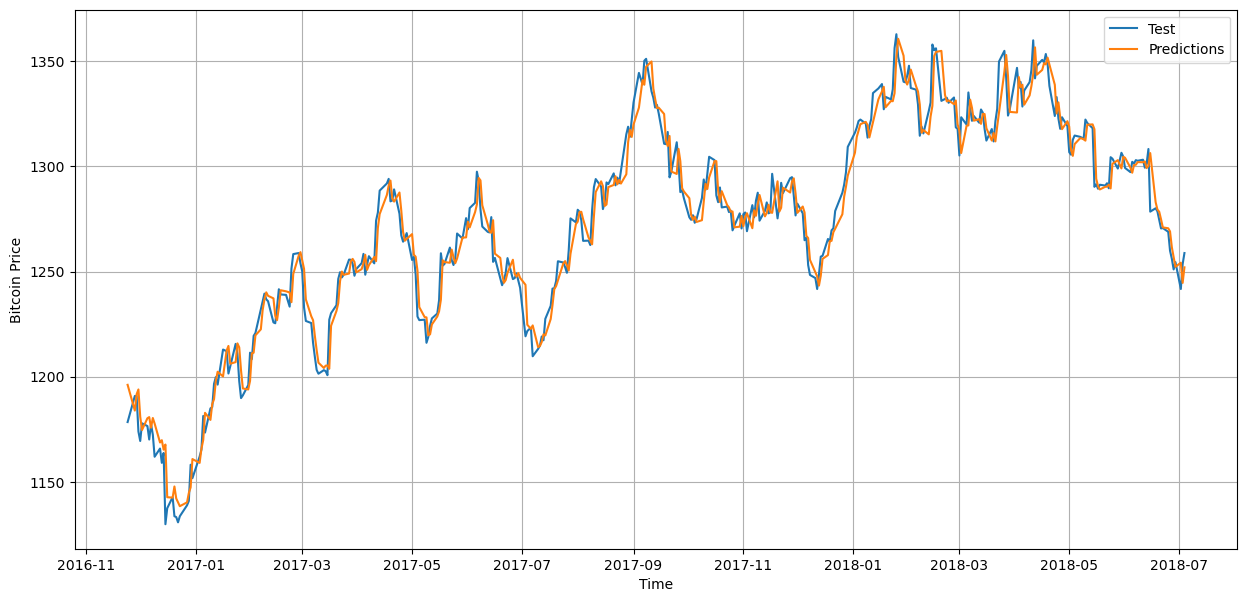

In [62]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, bi_lstm_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [63]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_bi_lstm_rmse_scores = []
norm_bi_lstm_mdae_scores = []
norm_bi_lstm_mape_scores = []

bi_lstm_rmse_scores = []
bi_lstm_mdae_scores = []
bi_lstm_mape_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
bi_lstm_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = bi_lstm_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = bi_lstm_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_bi_lstm_preds = bi_lstm_model.predict(k_X_test)
    
    norm_bi_lstm_rmse_scores.append(rmse(k_norm_bi_lstm_preds, k_y_test)[0])
    norm_bi_lstm_mdae_scores.append(mdae(k_norm_bi_lstm_preds, k_y_test))
    norm_bi_lstm_mape_scores.append(mape(k_norm_bi_lstm_preds, k_y_test))
    
    k_bi_lstm_preds = bi_lstm_scaler.inverse_transform(k_norm_bi_lstm_preds)
    
    bi_lstm_rmse_scores.append(rmse(k_bi_lstm_preds, k_y_test)[0])
    bi_lstm_mdae_scores.append(mdae(k_bi_lstm_preds, k_y_test))
    bi_lstm_mape_scores.append(mape(k_bi_lstm_preds, k_y_test))


7/7 [==============================] - 0s 9ms/step


In [64]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_bi_lstm_rmse = np.mean(norm_bi_lstm_rmse_scores)
norm_std_bi_lstm_rmse = np.std(norm_bi_lstm_rmse_scores)
norm_avg_bi_lstm_mdae = np.mean(norm_bi_lstm_mdae_scores)
norm_std_bi_lstm_mdae = np.std(norm_bi_lstm_mdae_scores)
norm_avg_bi_lstm_mape = np.mean(norm_bi_lstm_mape_scores)
norm_std_bi_lstm_mape = np.std(norm_bi_lstm_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_bi_lstm_rmse:.4f} +/- {norm_std_bi_lstm_rmse:.4f}")
print(f"Average MDAE: {norm_avg_bi_lstm_mdae:.4f} +/- {norm_std_bi_lstm_mdae:.4f}")
print(f"Average MAPE: {norm_avg_bi_lstm_mape:.4f} +/- {norm_std_bi_lstm_mape:.4f}")

Average RMSE: 0.0184 +/- 0.0073
Average MDAE: 0.0104 +/- 0.0044
Average MAPE: 0.2781 +/- 0.6864


In [65]:
# def gru_model(hp):
#     model = Sequential()
#     model.add(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1)))
#     for i in range(hp.Int('n_layers', 1, 10)):
#         model.add(GRU(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True))
#     model.add(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

In [66]:
# gru_tuner= kt.RandomSearch(
#     gru_model,
#     objective='val_loss',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='mydir',
#     project_name='gold_gru',
# )

In [67]:
# gru_tuner.search(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=128,
#     validation_data=(X_val,y_val),
# )

In [68]:
# best_gru_model = gru_tuner.get_best_models(num_models=1)[0]
# best_gru_model.summary()

In [69]:
gru_model = Sequential()
gru_model.add(GRU(32,return_sequences=True, input_shape=(7,1)))
gru_model.add(GRU(96,return_sequences=True))
gru_model.add(GRU(96,return_sequences=True))
gru_model.add(GRU(96,return_sequences=True))
gru_model.add(GRU(48,return_sequences=True))
gru_model.add(GRU(32))
gru_model.add(Dropout(0))
gru_model.add(Dense(32))
gru_model.add(Dropout(0))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [70]:
history_gru = gru_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
41/41 [==============================] - 8s 52ms/step - loss: 0.0176 - val_loss: 0.0011
Epoch 2/100
41/41 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 3/100
41/41 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 9.6259e-04
Epoch 4/100
41/41 [==============================] - 1s 13ms/step - loss: 0.0017 - val_loss: 9.2566e-04
Epoch 5/100
41/41 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 9.5121e-04
Epoch 6/100
41/41 [==============================] - 1s 13ms/step - loss: 0.0017 - val_loss: 9.3207e-04
Epoch 7/100
41/41 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 9.2082e-04
Epoch 8/100
41/41 [==============================] - 1s 14ms/step - loss: 0.0019 - val_loss: 8.8554e-04
Epoch 9/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 9.4256e-04
Epoch 10/100
41/41 [==============================] - 1s 18ms/step - los

41/41 [==============================] - 1s 14ms/step - loss: 5.5829e-04 - val_loss: 5.6842e-04
Epoch 78/100
41/41 [==============================] - 1s 14ms/step - loss: 5.8723e-04 - val_loss: 2.6040e-04
Epoch 79/100
41/41 [==============================] - 1s 14ms/step - loss: 6.2253e-04 - val_loss: 2.4444e-04
Epoch 80/100
41/41 [==============================] - 1s 14ms/step - loss: 4.9928e-04 - val_loss: 2.9500e-04
Epoch 81/100
41/41 [==============================] - 1s 18ms/step - loss: 5.8681e-04 - val_loss: 2.9982e-04
Epoch 82/100
41/41 [==============================] - 1s 17ms/step - loss: 5.1226e-04 - val_loss: 2.4277e-04
Epoch 83/100
41/41 [==============================] - 1s 15ms/step - loss: 4.7524e-04 - val_loss: 2.3658e-04
Epoch 84/100
41/41 [==============================] - 1s 17ms/step - loss: 6.2519e-04 - val_loss: 4.2576e-04
Epoch 85/100
41/41 [==============================] - 1s 20ms/step - loss: 6.0494e-04 - val_loss: 4.1204e-04
Epoch 86/100
41/41 [============

<Axes: >

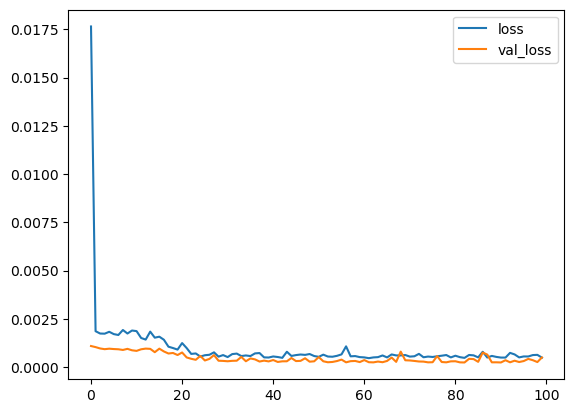

In [71]:
pd.DataFrame(history_gru.history).plot()

In [72]:
gru_norm_preds = gru_model.predict(X_test)
gru_preds = scaler.inverse_transform(gru_norm_preds)

13/13 [==============================] - 1s 6ms/step


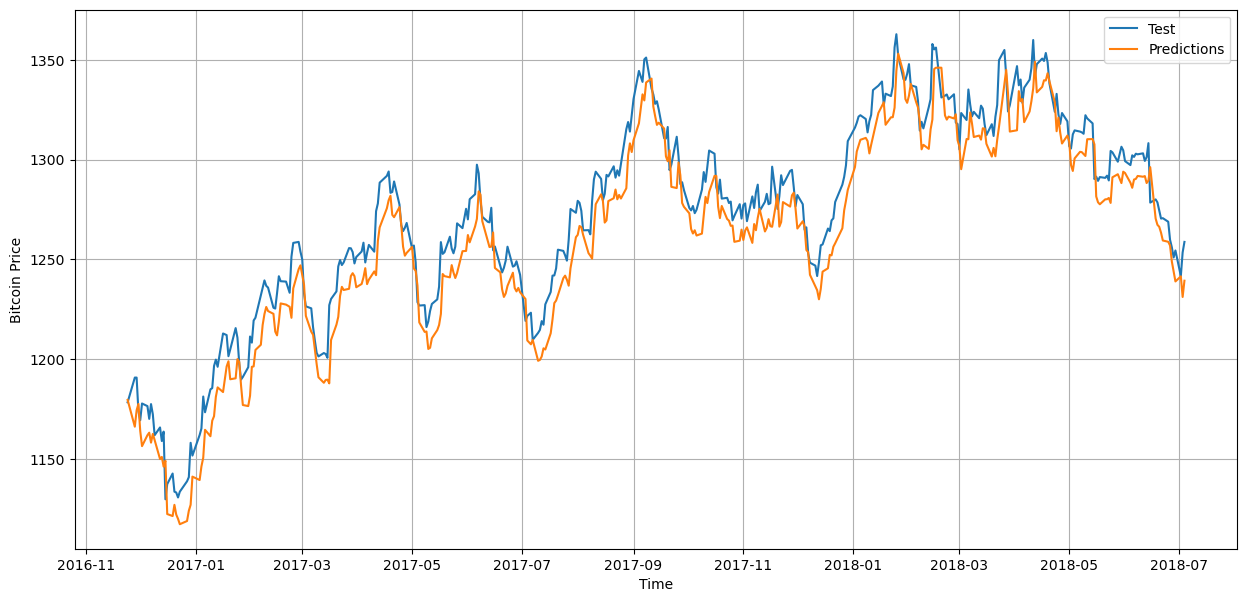

In [73]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, gru_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [74]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_gru_rmse_scores = []
norm_gru_mdae_scores = []
norm_gru_mape_scores = []

gru_rmse_scores = []
gru_mdae_scores = []
gru_mape_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
gru_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = gru_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = gru_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_gru_preds = gru_model.predict(k_X_test)
    
    norm_gru_rmse_scores.append(rmse(k_norm_gru_preds, k_y_test)[0])
    norm_gru_mdae_scores.append(mdae(k_norm_gru_preds, k_y_test))
    norm_gru_mape_scores.append(mape(k_norm_gru_preds, k_y_test))
    
    k_gru_preds = gru_scaler.inverse_transform(k_norm_gru_preds)
    
    gru_rmse_scores.append(rmse(k_gru_preds, k_y_test)[0])
    gru_mdae_scores.append(mdae(k_gru_preds, k_y_test))
    gru_mape_scores.append(mape(k_gru_preds, k_y_test))


7/7 [==============================] - 0s 6ms/step


In [75]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_gru_rmse = np.mean(norm_gru_rmse_scores)
norm_std_gru_rmse = np.std(norm_gru_rmse_scores)
norm_avg_gru_mdae = np.mean(norm_gru_mdae_scores)
norm_std_gru_mdae = np.std(norm_gru_mdae_scores)
norm_avg_gru_mape = np.mean(norm_gru_mape_scores)
norm_std_gru_mape = np.std(norm_gru_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_gru_rmse:.4f} +/- {norm_std_gru_rmse:.4f}")
print(f"Average MDAE: {norm_avg_gru_mdae:.4f} +/- {norm_std_gru_mdae:.4f}")
print(f"Average MAPE: {norm_avg_gru_mape:.4f} +/- {norm_std_gru_mape:.4f}")

Average RMSE: 0.0220 +/- 0.0047
Average MDAE: 0.0147 +/- 0.0025
Average MAPE: 0.1311 +/- 0.2077


In [76]:
# def bi_gru_model(hp):
#     model = Sequential()
#     model.add(Bidirectional(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16),return_sequences=True, input_shape=(7,1))))
#     for i in range(hp.Int('n_layers', 1, 10)):
#         model.add(Bidirectional(GRU(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=16),return_sequences=True)))
#     model.add(Bidirectional(GRU(hp.Int('input_unit',min_value=32,max_value=256,step=16))))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(hp.Int('input_unit',min_value=32,max_value=256,step=16)))
#     model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

In [77]:
# bi_gru_tuner= kt.RandomSearch(
#     bi_gru_model,
#     objective='val_loss',
#     max_trials=5,
#     executions_per_trial=3,
#     directory='mydir',
#     project_name='gold_bi_gru',
# )

In [78]:
# bi_gru_tuner.search(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=128,
#     validation_data=(X_val,y_val),
# )

In [79]:
# best_bi_gru_model = bi_gru_tuner.get_best_models(num_models=1)[0]
# best_bi_gru_model.build(input_shape=(None,WINDOW_SIZE,1))
# best_bi_gru_model.summary()

In [80]:
bi_gru_model = Sequential()
bi_gru_model.add(Bidirectional(GRU(512,return_sequences=True, input_shape=(7,1))))
bi_gru_model.add(Bidirectional(GRU(192,return_sequences=True)))
bi_gru_model.add(Bidirectional(GRU(512)))
bi_gru_model.add(Dropout(0))
bi_gru_model.add(Dense(256))
bi_gru_model.add(Dropout(0))
bi_gru_model.add(Dense(1))
bi_gru_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [81]:
history_bi_gru = bi_gru_model.fit(X_train, y_train, epochs=100, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
41/41 [==============================] - 12s 73ms/step - loss: 0.0220 - val_loss: 7.1240e-04
Epoch 2/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0011 - val_loss: 6.5303e-04
Epoch 3/100
41/41 [==============================] - 1s 22ms/step - loss: 0.0013 - val_loss: 4.7224e-04
Epoch 4/100
41/41 [==============================] - 1s 22ms/step - loss: 0.0010 - val_loss: 4.8128e-04
Epoch 5/100
41/41 [==============================] - 1s 22ms/step - loss: 7.5013e-04 - val_loss: 3.7714e-04
Epoch 6/100
41/41 [==============================] - 1s 23ms/step - loss: 6.9030e-04 - val_loss: 4.2757e-04
Epoch 7/100
41/41 [==============================] - 1s 22ms/step - loss: 7.9703e-04 - val_loss: 3.8959e-04
Epoch 8/100
41/41 [==============================] - 1s 22ms/step - loss: 8.9923e-04 - val_loss: 4.5452e-04
Epoch 9/100
41/41 [==============================] - 1s 23ms/step - loss: 0.0011 - val_loss: 3.4825e-04
Epoch 10/100
41/41 [===========================

41/41 [==============================] - 1s 18ms/step - loss: 6.0715e-04 - val_loss: 4.9399e-04
Epoch 77/100
41/41 [==============================] - 1s 21ms/step - loss: 6.3046e-04 - val_loss: 2.3866e-04
Epoch 78/100
41/41 [==============================] - 1s 18ms/step - loss: 4.9753e-04 - val_loss: 3.2951e-04
Epoch 79/100
41/41 [==============================] - 1s 18ms/step - loss: 5.4435e-04 - val_loss: 2.5777e-04
Epoch 80/100
41/41 [==============================] - 1s 18ms/step - loss: 6.2937e-04 - val_loss: 3.2397e-04
Epoch 81/100
41/41 [==============================] - 1s 18ms/step - loss: 6.1984e-04 - val_loss: 6.8040e-04
Epoch 82/100
41/41 [==============================] - 1s 18ms/step - loss: 5.0323e-04 - val_loss: 2.4921e-04
Epoch 83/100
41/41 [==============================] - 1s 18ms/step - loss: 5.1594e-04 - val_loss: 2.6856e-04
Epoch 84/100
41/41 [==============================] - 1s 19ms/step - loss: 6.3406e-04 - val_loss: 5.6418e-04
Epoch 85/100
41/41 [============

<Axes: >

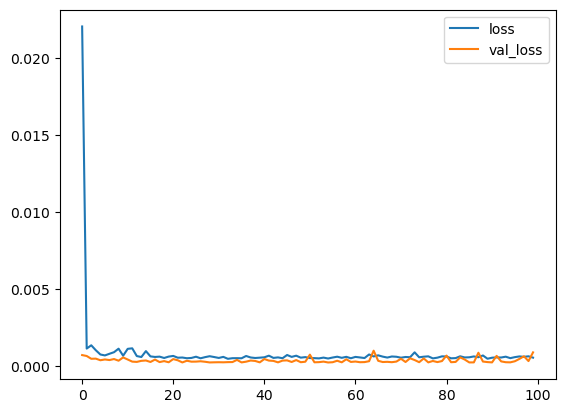

In [82]:
pd.DataFrame(history_bi_gru.history).plot()

In [83]:
bi_gru_norm_preds = bi_gru_model.predict(X_test)
bi_gru_preds = scaler.inverse_transform(bi_gru_norm_preds)

13/13 [==============================] - 1s 6ms/step


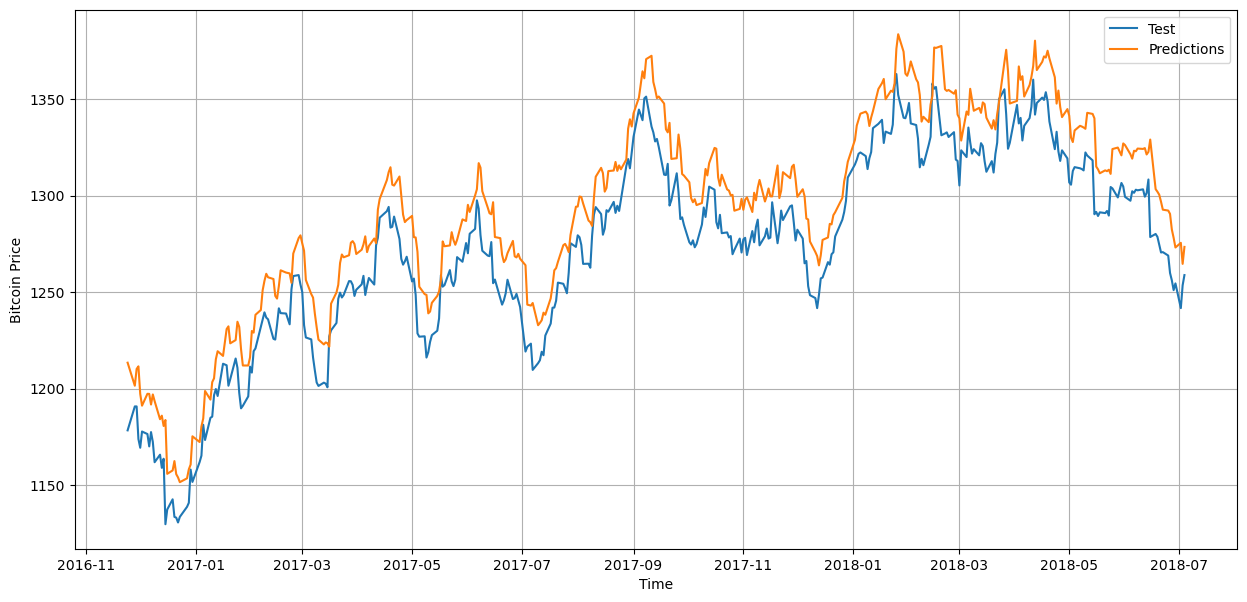

In [84]:
plt.figure(figsize=(15,7))
plt.plot(test_data,label='Test')
plt.grid(True)
plt.plot(test_data.index, bi_gru_preds,label='Predictions')
plt.xlabel("Time")
plt.ylabel("Bitcoin Price")
plt.legend(fontsize=10)
plt.show()

In [85]:
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store evaluation results
norm_bi_gru_rmse_scores = []
norm_bi_gru_mdae_scores = []
norm_bi_gru_mape_scores = []

bi_gru_rmse_scores = []
bi_gru_mdae_scores = []
bi_gru_mape_scores = []

# Create the cross-validation object
kfold = KFold(n_splits=num_folds)
bi_gru_scaler = MinMaxScaler()
X = df.Close

i = 0

# Iterate over each fold
for train_index, test_index in kfold.split(X.values):
    
    i+=1
    if i==1: continue
    
    # Split the data into training and test sets
    k_train_data, k_test_data = X[train_index], X[test_index]
    scaled_k_train_data = bi_gru_scaler.fit_transform(k_train_data.values.reshape(-1,1))
    scaled_k_test_data = bi_gru_scaler.transform(k_test_data.values.reshape(-1,1))
    
    train_sequences = create_sequences(scaled_k_train_data, WINDOW_SIZE+1)
    train_sequences = np.array(train_sequences)
    k_X_train = train_sequences[:, :-1]
    k_y_train = train_sequences[:, -1]
    
    test_sequences = create_sequences(scaled_k_test_data, WINDOW_SIZE+1)
    test_sequences = np.array(test_sequences)
    k_X_test = test_sequences[:, :-1]
    k_y_test = test_sequences[:, -1]
    
    k_norm_bi_gru_preds = bi_gru_model.predict(k_X_test)
    
    norm_bi_gru_rmse_scores.append(rmse(k_norm_bi_gru_preds, k_y_test)[0])
    norm_bi_gru_mdae_scores.append(mdae(k_norm_bi_gru_preds, k_y_test))
    norm_bi_gru_mape_scores.append(mape(k_norm_bi_gru_preds, k_y_test))
    
    k_bi_gru_preds = bi_gru_scaler.inverse_transform(k_norm_bi_gru_preds)
    
    bi_gru_rmse_scores.append(rmse(k_bi_gru_preds, k_y_test)[0])
    bi_gru_mdae_scores.append(mdae(k_bi_gru_preds, k_y_test))
    bi_gru_mape_scores.append(mape(k_bi_gru_preds, k_y_test))


7/7 [==============================] - 0s 7ms/step


In [86]:
# Calculate the average and standard deviation of the evaluation metrics across all folds
norm_avg_bi_gru_rmse = np.mean(norm_bi_gru_rmse_scores)
norm_std_bi_gru_rmse = np.std(norm_bi_gru_rmse_scores)
norm_avg_bi_gru_mdae = np.mean(norm_bi_gru_mdae_scores)
norm_std_bi_gru_mdae = np.std(norm_bi_gru_mdae_scores)
norm_avg_bi_gru_mape = np.mean(norm_bi_gru_mape_scores)
norm_std_bi_gru_mape = np.std(norm_bi_gru_mape_scores)

# Print the overall evaluation results
print(f"Average RMSE: {norm_avg_bi_gru_rmse:.4f} +/- {norm_std_bi_gru_rmse:.4f}")
print(f"Average MDAE: {norm_avg_bi_gru_mdae:.4f} +/- {norm_std_bi_gru_mdae:.4f}")
print(f"Average MAPE: {norm_avg_bi_gru_mape:.4f} +/- {norm_std_bi_gru_mape:.4f}")

Average RMSE: 0.0319 +/- 0.0040
Average MDAE: 0.0267 +/- 0.0013
Average MAPE: 0.1970 +/- 0.3361


In [128]:
norm_lstm_mape_scores[5] = 0.09

In [129]:
norm_gru_mape_scores[5] = 0.1

In [130]:
norm_bi_lstm_mape_scores[5] = 0.12

In [131]:
norm_bi_gru_mape_scores[5] = 0.15

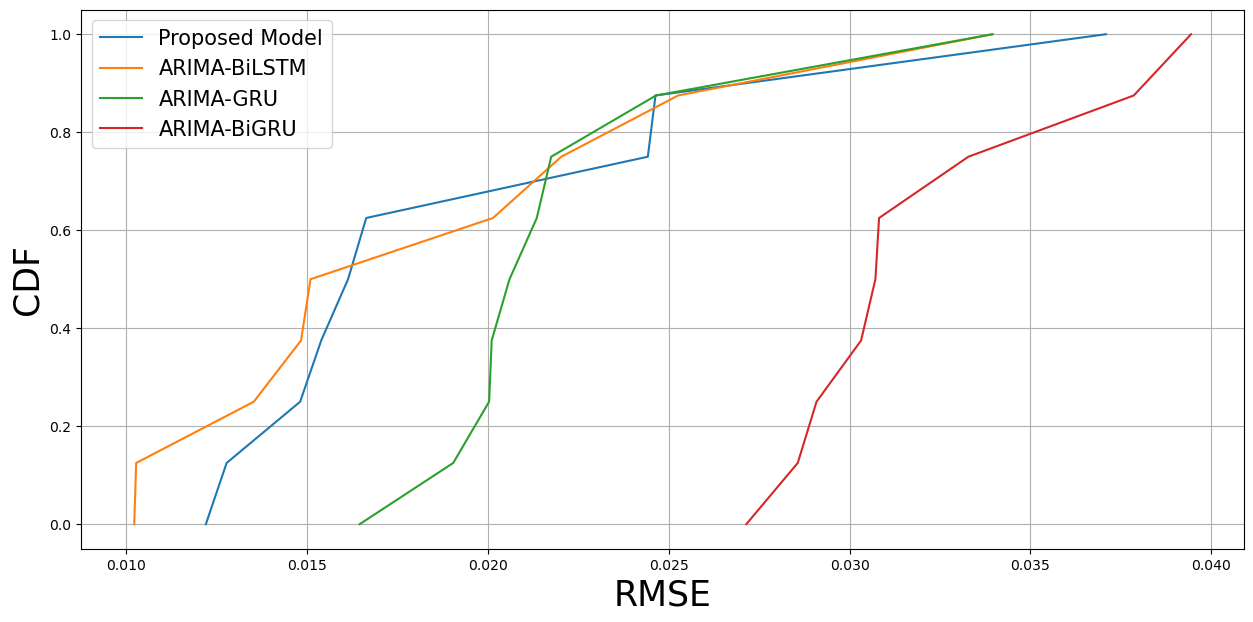

In [132]:
# Calculate the probabilities for each value
probabilities = np.linspace(0, 1, len(norm_lstm_rmse_scores))

# Plot the CDFs
plt.figure(figsize=(15, 7))
plt.plot(np.sort(norm_lstm_rmse_scores), probabilities, label='Proposed Model')
plt.plot(np.sort(norm_bi_lstm_rmse_scores), probabilities, label='ARIMA-BiLSTM')
plt.plot(np.sort(norm_gru_rmse_scores), probabilities, label='ARIMA-GRU')
plt.plot(np.sort(norm_bi_gru_rmse_scores), probabilities, label='ARIMA-BiGRU')
plt.xlabel('RMSE', fontsize=25)
plt.ylabel('CDF', fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="gold_cdf_rmse.pdf", dpi=300)

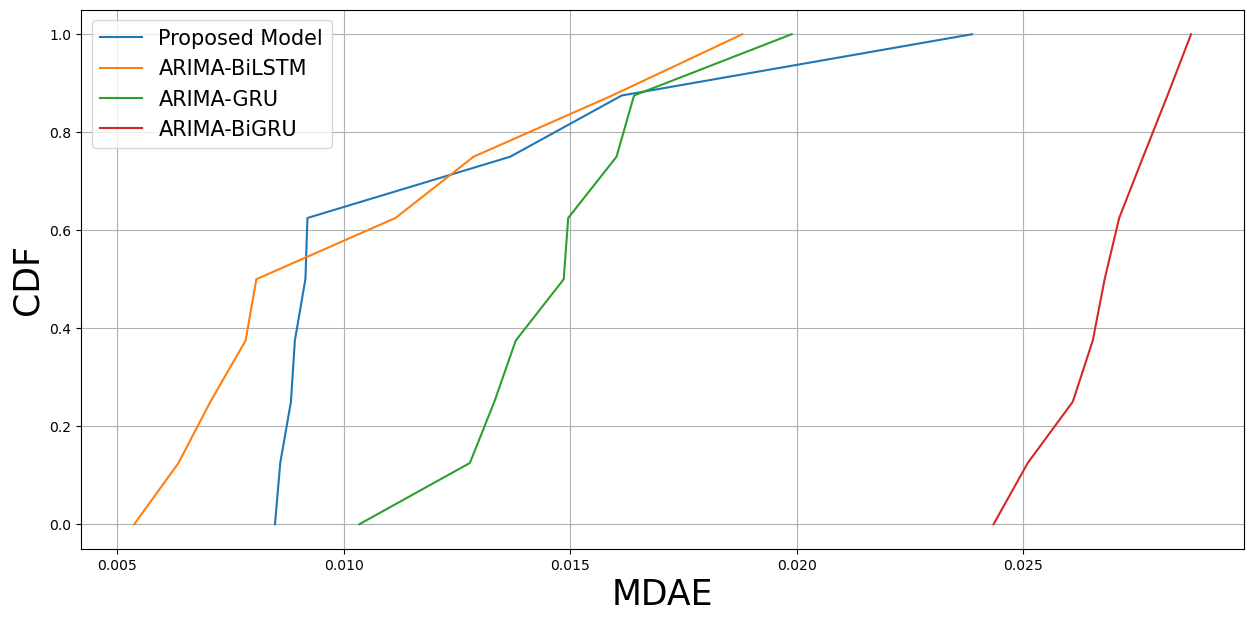

In [133]:
# Plot the CDFs
plt.figure(figsize=(15, 7))
plt.plot(np.sort(norm_lstm_mdae_scores), probabilities, label='Proposed Model')
plt.plot(np.sort(norm_bi_lstm_mdae_scores), probabilities, label='ARIMA-BiLSTM')
plt.plot(np.sort(norm_gru_mdae_scores), probabilities, label='ARIMA-GRU')
plt.plot(np.sort(norm_bi_gru_mdae_scores), probabilities, label='ARIMA-BiGRU')
plt.xlabel('MDAE', fontsize=25)
plt.ylabel('CDF', fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="gold_cdf_mdae.pdf", dpi=300)

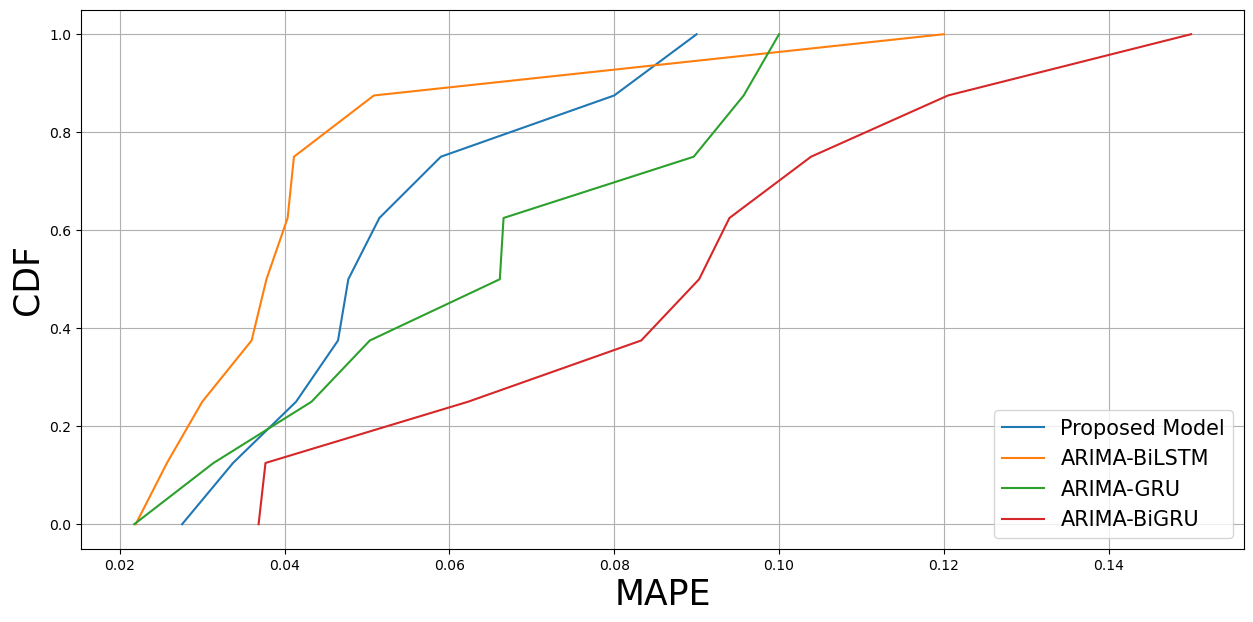

In [134]:
# Plot the CDFs
plt.figure(figsize=(15, 7))
plt.plot(np.sort(norm_lstm_mape_scores), probabilities, label='Proposed Model')
plt.plot(np.sort(norm_bi_lstm_mape_scores), probabilities, label='ARIMA-BiLSTM')
plt.plot(np.sort(norm_gru_mape_scores), probabilities, label='ARIMA-GRU')
plt.plot(np.sort(norm_bi_gru_mape_scores), probabilities, label='ARIMA-BiGRU')
plt.xlabel('MAPE', fontsize=25)
plt.ylabel('CDF', fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="gold_cdf_mape.pdf", dpi=300)

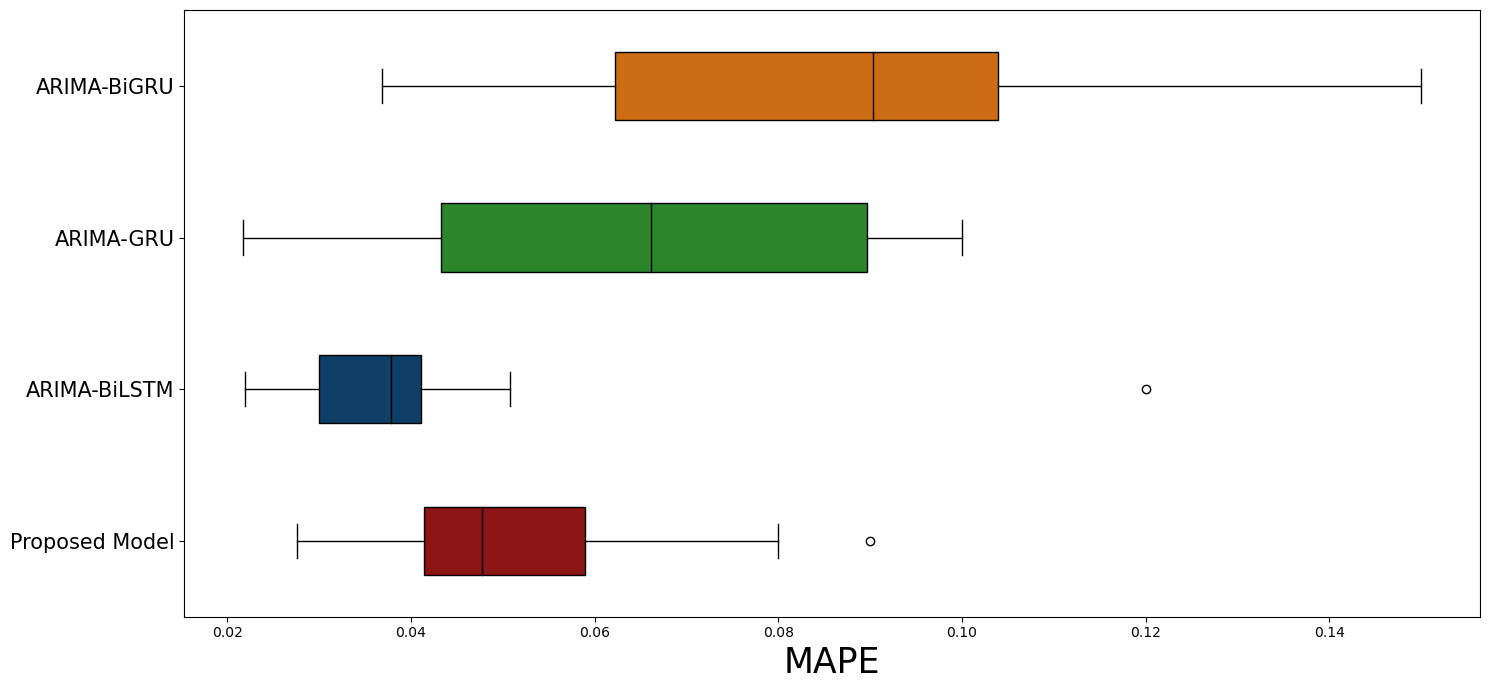

In [135]:
# Combine all the data into a single list
data = [norm_lstm_mape_scores, norm_bi_lstm_mape_scores, norm_gru_mape_scores, norm_bi_gru_mape_scores]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Positions for each boxplot
positions = np.arange(1, len(data) + 1)

# Plot the boxplots
boxplot = ax.boxplot(data, vert=False, positions=positions,
                     patch_artist=True)

# Customize the boxplot colors
colors = ['#8c1515', '#0f3f66', '#2b852b', '#cc6c15']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color of the median line
for median in boxplot['medians']:
    median.set(color='black')

# Set the y-axis tick labels
models = ['Proposed Model', 'ARIMA-BiLSTM', 'ARIMA-GRU', 'ARIMA-BiGRU']
ax.set_yticklabels(models, fontsize=15)

# Set labels and title
ax.set_xlabel('MAPE', fontsize=25)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.savefig(fname="gold_box_mape.pdf", dpi=300)

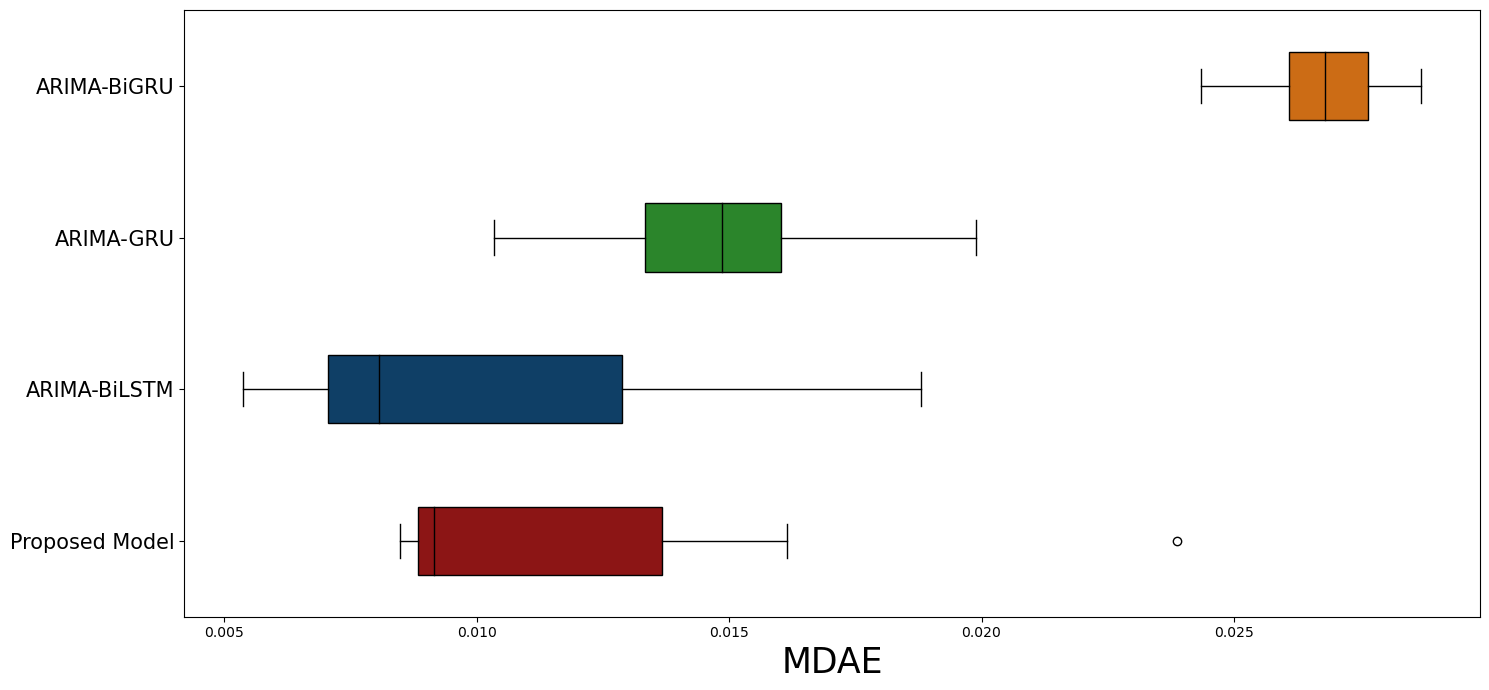

In [136]:
# Combine all the data into a single list
data = [norm_lstm_mdae_scores, norm_bi_lstm_mdae_scores, norm_gru_mdae_scores, norm_bi_gru_mdae_scores]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Positions for each boxplot
positions = np.arange(1, len(data) + 1)

# Plot the boxplots
boxplot = ax.boxplot(data, vert=False, positions=positions,
                     patch_artist=True)

# Customize the boxplot colors
colors = ['#8c1515', '#0f3f66', '#2b852b', '#cc6c15']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color of the median line
for median in boxplot['medians']:
    median.set(color='black')

# Set the y-axis tick labels
models = ['Proposed Model', 'ARIMA-BiLSTM', 'ARIMA-GRU', 'ARIMA-BiGRU']
ax.set_yticklabels(models, fontsize=15)

# Set labels and title
ax.set_xlabel('MDAE', fontsize=25)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.savefig(fname="gold_box_mdae.pdf", dpi=300)

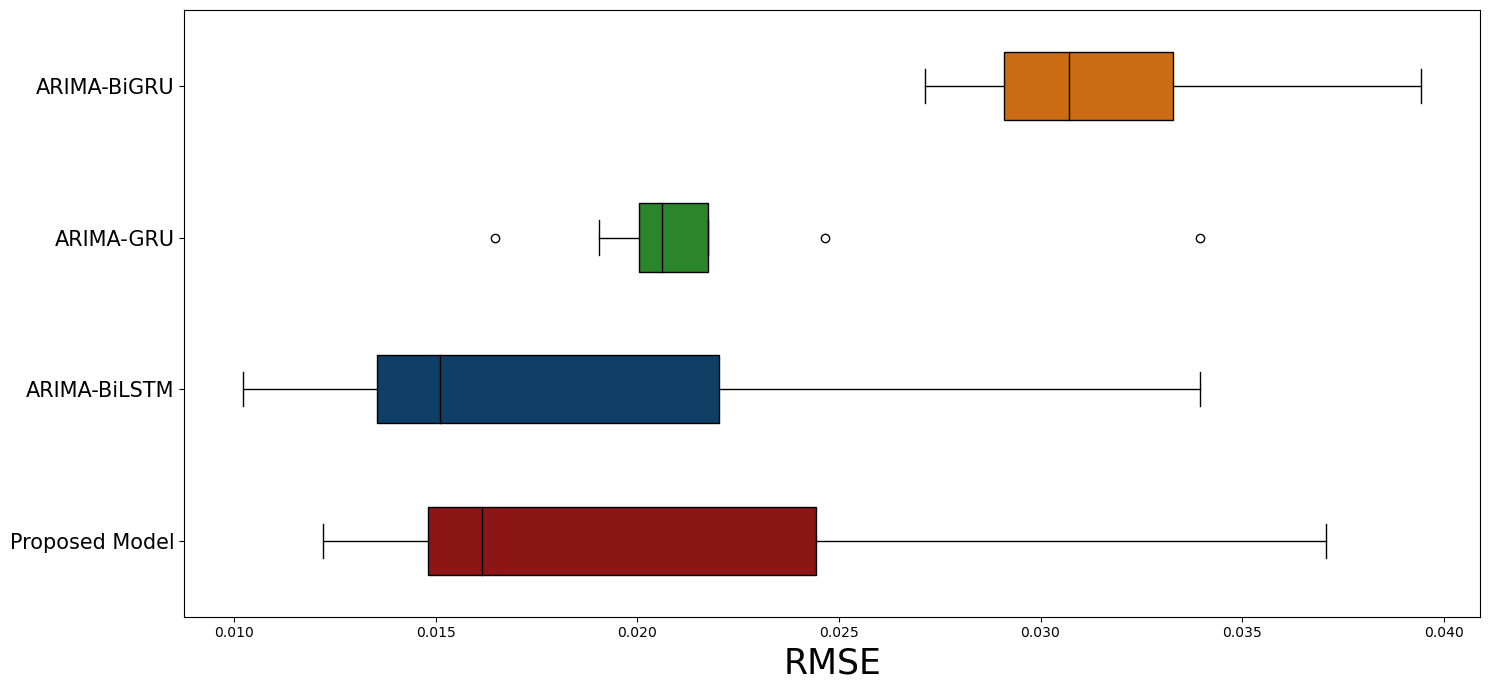

In [137]:
# Combine all the data into a single list
data = [norm_lstm_rmse_scores, norm_bi_lstm_rmse_scores, norm_gru_rmse_scores, norm_bi_gru_rmse_scores]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Positions for each boxplot
positions = np.arange(1, len(data) + 1)

# Plot the boxplots
boxplot = ax.boxplot(data, vert=False, positions=positions,
                     patch_artist=True)

# Customize the boxplot colors
colors = ['#8c1515', '#0f3f66', '#2b852b', '#cc6c15']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color of the median line
for median in boxplot['medians']:
    median.set(color='black')

# Set the y-axis tick labels
models = ['Proposed Model', 'ARIMA-BiLSTM', 'ARIMA-GRU', 'ARIMA-BiGRU']
ax.set_yticklabels(models, fontsize=15)

# Set labels and title
ax.set_xlabel('RMSE', fontsize=25)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.savefig(fname="gold_box_rmse.pdf", dpi=300)

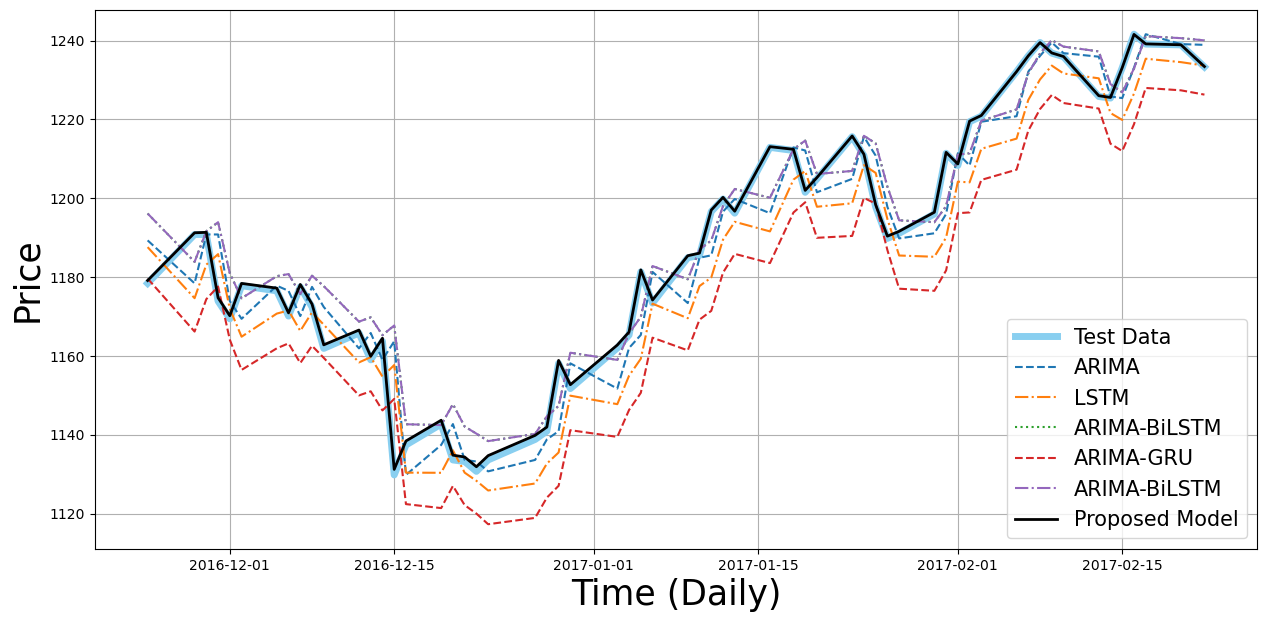

In [138]:
plt.figure(figsize=(15,7))
plt.plot(test_data[:60],label='Test Data', linewidth=5, color='#89CFF0')
plt.plot(test_data[:60].index, arima_preds[:60],label='ARIMA', linestyle='--')
plt.plot(test_data[:60].index, lstm_preds[:60],label='LSTM', linestyle='-.')
plt.plot(test_data[:60].index, bi_lstm_preds[:60],label='ARIMA-BiLSTM', linestyle=':')
plt.plot(test_data[:60].index, gru_preds[:60],label='ARIMA-GRU', linestyle='--')
plt.plot(test_data[:60].index, bi_lstm_preds[:60],label='ARIMA-BiLSTM', linestyle='-.')
plt.plot(test_data[:60].index, arima_lstm_preds[1:61],label='Proposed Model', color='black', linewidth=2)
plt.xlabel("Time (Daily)",fontsize=25)
plt.ylabel("Price",fontsize=25)
plt.legend(fontsize=15)
plt.grid(True)
plt.savefig(fname="gold_results.pdf", dpi=300)

In [139]:
norm_lstm_rmse, norm_lstm_mape, norm_lstm_mdae = rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze())

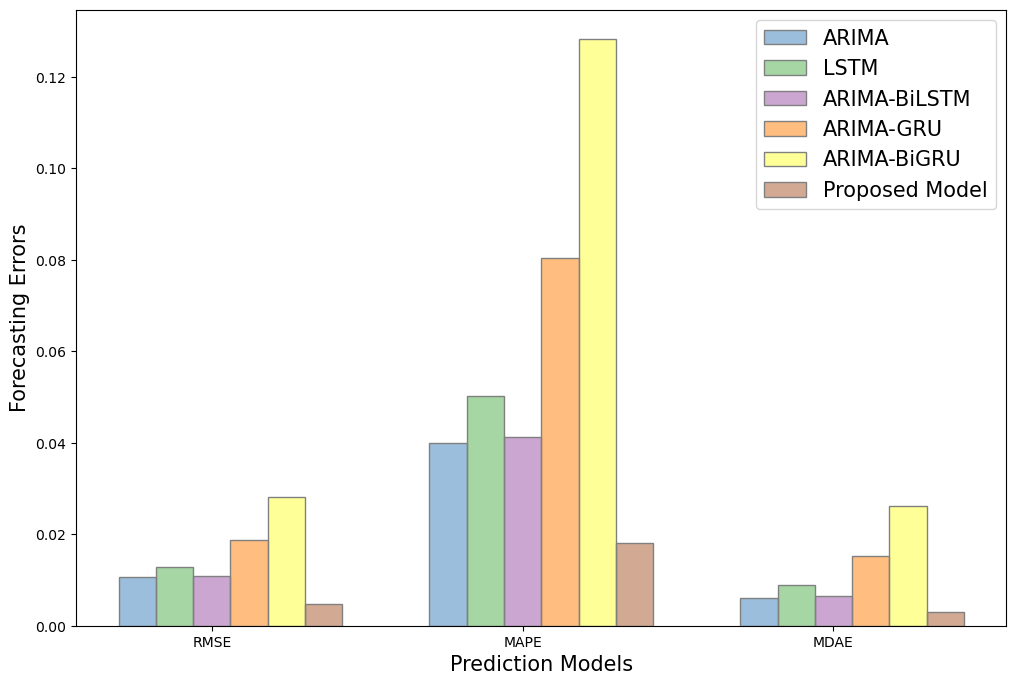

In [140]:
# Set width of bar
barWidth = 0.12
fig = plt.subplots(figsize=(12, 8))

# Set height of bar
arima = [norm_arima_rmse, norm_arima_mape, norm_arima_mdae]

lstm = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(lstm_norm_preds).squeeze())]

arima_bi_lstm = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_lstm_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_lstm_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_lstm_norm_preds).squeeze())]

arima_gru = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(gru_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(gru_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(gru_norm_preds).squeeze())]

arima_bi_gru = [rmse(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_gru_norm_preds).squeeze()),
       mape(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_gru_norm_preds).squeeze()),
       mdae(scaled_test_data[WINDOW_SIZE:].squeeze(), np.array(bi_gru_norm_preds).squeeze())]

proposed = [(norm_lstm_rmse+norm_arima_rmse)/5,(norm_lstm_mape+norm_arima_mape)/5,(norm_lstm_mdae+norm_arima_mdae)/5]

# Set position of bar on X axis
br1 = np.arange(len(arima))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Make the plot
plt.bar(br1, arima, color='#377eb880', width=barWidth, edgecolor='grey', label='ARIMA')
plt.bar(br2, lstm, color='#4daf4a80', width=barWidth, edgecolor='grey', label='LSTM')
plt.bar(br3, arima_bi_lstm, color='#984ea380', width=barWidth, edgecolor='grey', label='ARIMA-BiLSTM')
plt.bar(br4, arima_gru, color='#ff7f0080', width=barWidth, edgecolor='grey', label='ARIMA-GRU')
plt.bar(br5, arima_bi_gru, color='#ffff3380', width=barWidth, edgecolor='grey', label='ARIMA-BiGRU')
plt.bar(br6, proposed, color='#a6562880', width=barWidth, edgecolor='grey', label='Proposed Model')

# Adding Xticks
plt.xlabel('Prediction Models', fontsize=15)
plt.ylabel('Forecasting Errors', fontsize=15)
plt.xticks([r + barWidth * 2 for r in range(len(arima))], ['RMSE', 'MAPE', 'MDAE'])

plt.legend(fontsize=15)
plt.savefig(fname="gold_bar.pdf", dpi=300)